In [ ]:
!pip install python-chess

In [ ]:
import chess
import random

board = chess.Board()


#Caso queira jogar Player x I.A utilizar as funções abaixo no loop do game. 

def check_move(move):
  legal_moves = list(board.legal_moves)
  if move in legal_moves:
    return move
  else:
    print("Esses são os movimentos possiveis:", legal_moves)
    input("Movimento inválido, por favor digite novamente: ")
    return move

def move_piece(move):
  check_move(move)
  board.push(move)

# ''' Mapeamento de pontuação das peças de acordo com a posição'''

peao_value = [
    0, 0, 0, 0, 0, 0, 0, 0,
    5, 10, 10, -20, -20, 10, 10, 5,
    5, -5, -10, 0, 0, -10, -5, 5,
    0, 0, 0, 20, 20, 0, 0, 0,
    5, 5, 10, 25, 25, 10, 5, 5,
    10, 10, 20, 30, 30, 20, 10, 10,
    50, 50, 50, 50, 50, 50, 50, 50,
    0, 0, 0, 0, 0, 0, 0, 0]

cavalo_value = [
    -50, -40, -30, -30, -30, -30, -40, -50,
    -40, -20, 0, 5, 5, 0, -20, -40,
    -30, 5, 10, 15, 15, 10, 5, -30,
    -30, 0, 15, 20, 20, 15, 0, -30,
    -30, 5, 15, 20, 20, 15, 5, -30,
    -30, 0, 10, 15, 15, 10, 0, -30,
    -40, -20, 0, 0, 0, 0, -20, -40,
    -50, -40, -30, -30, -30, -30, -40, -50]

bispo_value = [
    -20, -10, -10, -10, -10, -10, -10, -20,
    -10, 5, 0, 0, 0, 0, 5, -10,
    -10, 10, 10, 10, 10, 10, 10, -10,
    -10, 0, 10, 10, 10, 10, 0, -10,
    -10, 5, 5, 10, 10, 5, 5, -10,
    -10, 0, 5, 10, 10, 5, 0, -10,
    -10, 0, 0, 0, 0, 0, 0, -10,
    -20, -10, -10, -10, -10, -10, -10, -20]

torre_value = [
    0, 0, 0, 5, 5, 0, 0, 0,
    -5, 0, 0, 0, 0, 0, 0, -5,
    -5, 0, 0, 0, 0, 0, 0, -5,
    -5, 0, 0, 0, 0, 0, 0, -5,
    -5, 0, 0, 0, 0, 0, 0, -5,
    -5, 0, 0, 0, 0, 0, 0, -5,
    5, 10, 10, 10, 10, 10, 10, 5,
    0, 0, 0, 0, 0, 0, 0, 0]

rainha_value = [
    -20, -10, -10, -5, -5, -10, -10, -20,
    -10, 0, 0, 0, 0, 0, 0, -10,
    -10, 5, 5, 5, 5, 5, 0, -10,
    0, 0, 5, 5, 5, 5, 0, -5,
    -5, 0, 5, 5, 5, 5, 0, -5,
    -10, 0, 5, 5, 5, 5, 0, -10,
    -10, 0, 0, 0, 0, 0, 0, -10,
    -20, -10, -10, -5, -5, -10, -10, -20]

rei_value = [
    20, 30, 10, 0, 0, 10, 30, 20,
    20, 20, 0, 0, 0, 0, 20, 20,
    -10, -20, -20, -20, -20, -20, -20, -10,
    -20, -30, -30, -40, -40, -30, -30, -20,
    -30, -40, -40, -50, -50, -40, -40, -30,
    -30, -40, -40, -50, -50, -40, -40, -30,
    -30, -40, -40, -50, -50, -40, -40, -30,
    -30, -40, -40, -50, -50, -40, -40, -30]

# '''Pontuação:
# - Checkmate (de acordo de quem é o turno):
# negativo (adversario)
# Positivo (voce)
# - Empate = 0
# - Jogo sem caminho pra seguir = 0'''

def avalia_board():
    if board.is_checkmate():
        if board.turn:
            return -9999
        else:
            return 9999
    if board.is_stalemate():
        return 0
    if board.is_insufficient_material():
        return 0

# '''Número de peças que estão no tabuleiro
# - número de peao branco, peao preto, torre branca, torre preta
# - utilizado pra fazer o calculo material da diferença de peças suas e do adversario
# Mapeia o numero de peças e a posição (que altera a pontuação da peça de acordo com a localização)''

    rainha_branca = len(board.pieces(chess.QUEEN, chess.WHITE))
    rainha_preta = len(board.pieces(chess.QUEEN, chess.BLACK))
    torre_branca = len(board.pieces(chess.ROOK, chess.WHITE))
    torre_preta = len(board.pieces(chess.ROOK, chess.BLACK))
    bispo_branco = len(board.pieces(chess.BISHOP, chess.WHITE))
    bispo_preto = len(board.pieces(chess.BISHOP, chess.BLACK))
    cavalo_branco = len(board.pieces(chess.KNIGHT, chess.WHITE)) 
    cavalo_preto = len(board.pieces(chess.KNIGHT, chess.BLACK))
    peao_branco = len(board.pieces(chess.PAWN, chess.WHITE)) 
    peao_preto = len(board.pieces(chess.PAWN, chess.BLACK)) 
    
    

#     '''Calculo Material:
# - Pra cada uma das peças, pega o valor da posição que ela se encontra e cruza com a tabela de peças
# - No mesmo calculo ele usa mirror para calcular o valor referente as peças pretas (square mirror)

# Valor total é o valor material mais o valor de numero de peças
# negativo (adversario)
# Positivo (voce)

# Min Max:
# Minima chance de perder (quando calcula as suas jogadas baseadas na do adversario)
# Maxima chance de ganhar (baseado nas suas jogadas para ganhar)'''
    material = 100 * (peao_branco - peao_preto) + 320 * (cavalo_branco - cavalo_preto) + 330 * (bispo_branco - bispo_preto) + 500 * (torre_branca - torre_preta) + 900 * (rainha_branca - rainha_preta)

    peaosq = sum([peao_value[i] for i in board.pieces(chess.PAWN, chess.WHITE)])
    peaosq = peaosq + sum([-peao_value[chess.square_mirror(i)]
                           for i in board.pieces(chess.PAWN, chess.BLACK)])
    cavalosq = sum([cavalo_value[i] for i in board.pieces(chess.KNIGHT, chess.WHITE)])
    cavalosq = cavalosq + sum([-cavalo_value[chess.square_mirror(i)]
                               for i in board.pieces(chess.KNIGHT, chess.BLACK)])
    bisposq = sum([bispo_value[i] for i in board.pieces(chess.BISHOP, chess.WHITE)])
    bisposq = bisposq + sum([-bispo_value[chess.square_mirror(i)]
                               for i in board.pieces(chess.BISHOP, chess.BLACK)])
    torresq = sum([torre_value[i] for i in board.pieces(chess.ROOK, chess.WHITE)])
    torresq = torresq + sum([-torre_value[chess.square_mirror(i)]
                           for i in board.pieces(chess.ROOK, chess.BLACK)])
    rainhasq = sum([rainha_value[i] for i in board.pieces(chess.QUEEN, chess.WHITE)])
    rainhasq = rainhasq + sum([-rainha_value[chess.square_mirror(i)]
                             for i in board.pieces(chess.QUEEN, chess.BLACK)])
    reisq = sum([rei_value[i] for i in board.pieces(chess.KING, chess.WHITE)])
    reisq = reisq + sum([-rei_value[chess.square_mirror(i)]
                           for i in board.pieces(chess.KING, chess.BLACK)])

    avaliacao = material + peaosq + cavalosq + bisposq + torresq + rainhasq + reisq
    if board.turn:
        return avaliacao
    else:
        return -avaliacao

# '''ALPHABETA
# Auxilia em diminuir os calculos de profundidade, ao invés de calcular a arvore interira ele vai até o que ja é melhor
# É a utilizada para o calculo das possibilidade, nível a nível
# Se chegou no fim da profundidade parametrizada, apenas calcula quisce
# se não chegou no final, apronfunda e calcula
# Se em um dos movimentos simulados alcançou uma pontuação maior que beta (que já é o do adversario), finaliza o calculo e retorna esse movimento que ganha
# Se é maior que o alpha ja armazenado, guarda e segue os procimos calculos'''

def alphabeta(alpha, beta, depthleft):
    bestscore = -9999
    if (depthleft == 0):
        return quiesce(alpha, beta)
    for move in board.legal_moves:
        board.push(move)
        score = -alphabeta(-beta, -alpha, depthleft - 1)
        board.pop()
        if (score >= beta):
            return score
        if (score > bestscore):
            bestscore = score
        if (score > alpha):
            alpha = score
    return bestscore
# '''QUIESCE
# Pontuação do tabuleiro
# se for maior que o beta retorna beta (finaliza)
# Maior que o alpha, armazena na pontuação do tabuleiro
# Além disso vai calcular se a posição final tem uma captura de peça, se houver ele deverá fazer a simulaçã desse movimento e não deve finalizar os calculos antes disso

# Ao fim retorna Alpha'''

def quiesce( alpha, beta ):
    stand_pat = avalia_board()
    if( stand_pat >= beta ):
        return beta
    if( alpha < stand_pat ):
        alpha = stand_pat

    for move in board.legal_moves:
        if board.is_capture(move):
            board.push(move)
            score = -quiesce( -beta, -alpha )
            board.pop()

            if( score >= beta ):
                return beta
            if( score > alpha ):
                alpha = score
    return alpha

# '''SelectMove (vai escolher o movimento baseado nas possibilidades de alphabeta)
# depth é a profundidade
# Não fará nada a principio e checará os movimentos possíveis
# Ele ira simular as jogadas e calcular o valor encontrado, cada vez que ele encontrar um movimento com valor superior ao movimento anterior, ele irá armazenar
# bestValue > bestMove > move
# Se o valor for melhor que o alpha (que é o valor inicial da jogada) armazena em alpha por enquanto
# No fim com um pop ele desfaz o movimento e recalcula o proximo (sempre armazenando os melhores vaore/movimentos)'''

def selectmove(depth):
        movehistory =[]
        bestMove = chess.Move.null()
        bestValue = -99999
        alpha = -100000
        beta = 100000
        for move in board.legal_moves:
            board.push(move)
            boardValue = -alphabeta(-beta, -alpha, depth-1)
            if boardValue > bestValue:
                bestValue = boardValue;
                bestMove = move
            if( boardValue > alpha ):
                alpha = boardValue
            board.pop()
        movehistory.append(bestMove)
        return bestMove



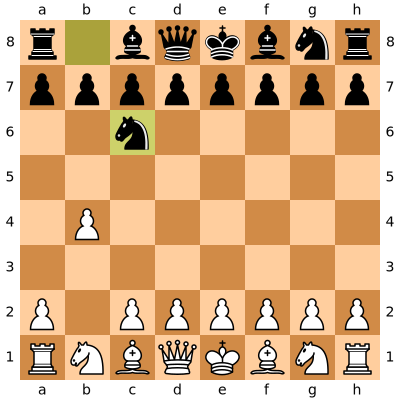

*


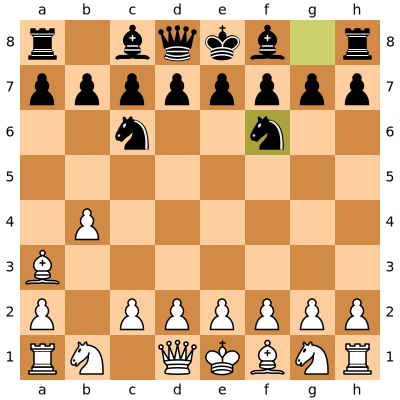

*


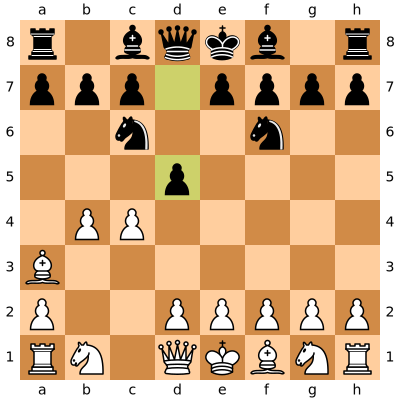

*


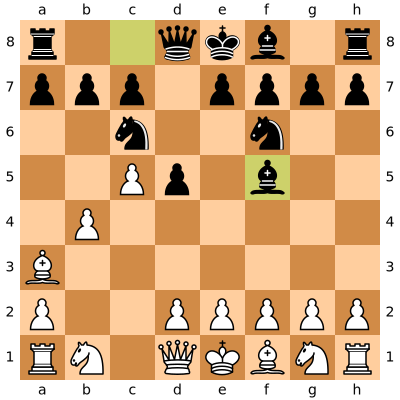

*


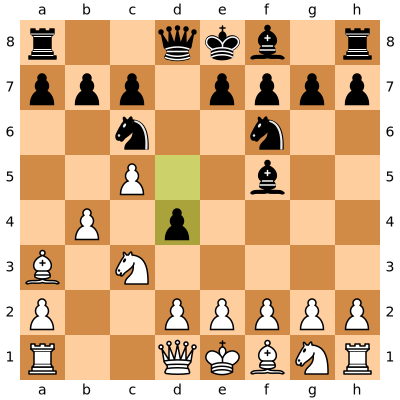

*


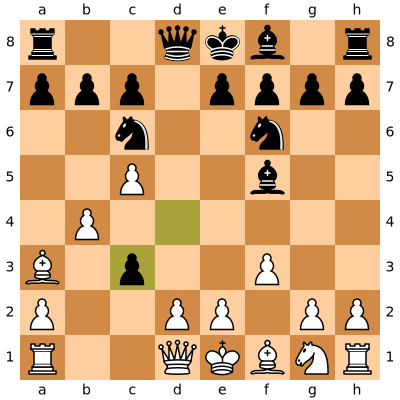

*


KeyboardInterrupt: ignored

In [ ]:
while not board.is_game_over(claim_draw=True):
    if board.turn:
        bot_move = random.choice(list(board.legal_moves))
        move_piece(bot_move)
    else:
        move = selectmove(3)
        board.push(move)
        display(board)
        print(board.result(claim_draw=True))
        
        



In [ ]:
board

In [ ]:
board.reset_board()

